# Вопросы тимлиду

Николай, привет! Рад приветствовать тебя вновь, буду рад почти неограниченно, если поможешь мне вникнуть в суть проекта) Спасибо!

key - номер партии, а внутри партии есть данные по итерациям выплавки стали. Как необходимо интерпретировать процесс: как временной ряд итераций внутри производства партии или нужно сразу брать "интегральные" характеристики для каждой партии и не дробить ее на части? Склоняюсь ко второму варианту, но если вдруг я не прав, то вот мои вопросы по этому направлению:
- Для первой партии нагревы производились примерно с 11-02 до 11-28, а замеры температуры с 11-16 до 11-30, то есть замеры не всегда проводятся перед легированием
- Нужно ли как-то совмещать итерацию с ее временем начала и конца и время добавления сыпухи/проволоки?

Теперь вопросы по пути, в котором я планирую агрегировать итерации в пределах одной партии
- По каждой партии известна продолжительность итерации и мощность нагрева. Суммарная мощность - абсурдная величина, поэтому, думаю, нужно оставить суммарное время и вычислить киловатт-часы (джоули). Не очень помню элтех, но вроде бы можно взять корень из суммы квадратов активной и реактивной мощностей, и умножить на время для каждой итерации (это будут джоули для итерации), а потом сложить все это и получить общую потраченную электроэнергию на партию.
- В data_bulk и data_wire столбцы - это как бы подаваемые из разных окошек/трайб-аппаратов легирующие компоненты? То есть если написано, что в 11:03:52 одновременно из bulk_12, bulk_14, bulk_15 подаются 206, 150 и 154 кг легирующего компонента, это не дубликат, а реальная подача, условно, никеля, молибдена и марганца?
- Если для партии температура измерялась несколько раз, а масса расплава росла, то какую брать температуру и справедливо ли брать последнюю измеренную температуру? А если замер проводился,  а температура не сохранилась, то следует ли вообще рассматривать такую партию или лучше исключить ее из рассмотрения целиком?

# План работы

- Первичный анализ и очистка данных
- Анализ корреляции признаков

- Объединение важных признаков в единый датасет

- Составление пайплайна машинного обучения

- Интерпретация и сравнение результатов

Выбор лучшей модели по скорости и точности обучения и предсказания

- Написание выводов/отчета

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
Я, видимо, в прошлый раз всё просмотрел, оставил комментарии, что всё ОК!!! и отослал спросить у тебя вопросов?<br>
Сейчас не оставлял своих записей, т.к. в прошлый раз писал...<br>

    
А с моделями - в следующий раз уже буду смотреть.....<br>


<div class="alert alert-info" style="border-color: green; border-radius: 5px">
    <p><u><b> КОММЕНТАРИЙ студента</b></u></p>
    
Привет! Да, сорри, запутался в этапах и случайно перезаписал твои прошлые комментарии. Там был только совет добавить в план исследование мультиколлинеарности признаков
    
<br>


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Привет Захар! Это Николай. Мне достался проект и на ревью, отлично.<br>
С предыдущими вопросами - понял. ОК.<br>
Так, как первую часть уже комментировал - сразу перейду ко второй).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Вопросы-тимлиду" data-toc-modified-id="Вопросы-тимлиду-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Вопросы тимлиду</a></span></li><li><span><a href="#План-работы" data-toc-modified-id="План-работы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>План работы</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Описание-этапа-обработки" data-toc-modified-id="Описание-этапа-обработки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Описание этапа обработки</a></span></li><li><span><a href="#Данные-об-электродах" data-toc-modified-id="Данные-об-электродах-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Данные об электродах</a></span></li><li><span><a href="#Данные-о-подаче-сыпучих-материалов-(объём)" data-toc-modified-id="Данные-о-подаче-сыпучих-материалов-(объём)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Данные о подаче сыпучих материалов (объём)</a></span></li><li><span><a href="#Данные-о-подаче-сыпучих-материалов-(время)" data-toc-modified-id="Данные-о-подаче-сыпучих-материалов-(время)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Данные о подаче сыпучих материалов (время)</a></span></li><li><span><a href="#Данные-о-продувке-сплава-газом" data-toc-modified-id="Данные-о-продувке-сплава-газом-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Данные о продувке сплава газом</a></span></li><li><span><a href="#Результаты-измерения-температуры" data-toc-modified-id="Результаты-измерения-температуры-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Результаты измерения температуры</a></span></li><li><span><a href="#Данные-о-проволочных-материалах-(объём)" data-toc-modified-id="Данные-о-проволочных-материалах-(объём)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Данные о проволочных материалах (объём)</a></span></li><li><span><a href="#Данные-о-проволочных-материалах-(время)" data-toc-modified-id="Данные-о-проволочных-материалах-(время)-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Данные о проволочных материалах (время)</a></span></li><li><span><a href="#Создание-единого-датасета" data-toc-modified-id="Создание-единого-датасета-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Создание единого датасета</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка на мультиколлинеарность</a></span></li><li><span><a href="#Разделение-датасета-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Разделение-датасета-на-обучающую-и-тестовую-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Разделение датасета на обучающую и тестовую выборки</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li><li><span><a href="#Оценка-важности-признаков" data-toc-modified-id="Оценка-важности-признаков-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Оценка важности признаков</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Отчет" data-toc-modified-id="Отчет-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Отчет</a></span></li></ul></div>

In [1]:
import random

from catboost import CatBoostRegressor

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
import optuna
from optuna.samplers import RandomSampler

import pandas as pd

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Исследовательский анализ данных

**Промышленность — задача проекта**

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

## Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

In [2]:
data_arc = pd.read_csv('data_arc.csv')
data_arc.name = 'data_arc'
data_bulk = pd.read_csv('data_bulk.csv')
data_bulk.name = 'data_bulk'
data_bulk_time = pd.read_csv('data_bulk_time.csv')
data_bulk_time.name = 'data_bulk_time'
data_gas = pd.read_csv('data_gas.csv')
data_gas.name = 'data_gas'
data_temp = pd.read_csv('data_temp.csv')
data_temp.name = 'data_temp'
data_wire = pd.read_csv('data_wire.csv')
data_wire.name = 'data_wire'
data_wire_time = pd.read_csv('data_wire_time.csv')
data_wire_time.name = 'data_wire_time'

In [3]:
for table in [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]:
    print('\nСлучайная запись из таблицы {} 👇'.format(table.name))
    display(table.sample(1))


Случайная запись из таблицы data_arc 👇


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
3141,681,2019-05-28 12:13:11,2019-05-28 12:15:25,0.597754,0.406205



Случайная запись из таблицы data_bulk 👇


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
2681,2782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,316.0,NaN,152.0,210.0



Случайная запись из таблицы data_bulk_time 👇


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40



Случайная запись из таблицы data_gas 👇


,key,Газ 1
1972,1975,20.558726



Случайная запись из таблицы data_temp 👇


,key,Время замера,Температура
4583,912,2019-06-05 23:28:25,1579.0



Случайная запись из таблицы data_wire 👇


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
291,314,68.097121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Случайная запись из таблицы data_wire_time 👇


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
2140,2250,2019-07-28 07:13:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Переименуем названия колонок

In [4]:
data_arc = data_arc.rename(columns={'Начало нагрева дугой':'arc_heating_start', 
                                    'Конец нагрева дугой': 'arc_heating_end',
                                    'Активная мощность': 'active_power',
                                    'Реактивная мощность': 'reactive_power'})

data_gas = data_gas.rename(columns={'Газ 1': 'amount__of_gas'})

data_temp = data_temp.rename(columns={'Время замера': 'measure_time', 'Температура': 'temperature'})

for table in [data_bulk, data_bulk_time, data_wire, data_wire_time]:
    table.columns = table.columns.str.replace(' ', '_').str.lower()

Составим функцию, выводящую сводную информацию по датасету

In [5]:
def full_info(df):
    display(pd.DataFrame({'Non-Null Count': (~df.isna()).sum(), 
                          'Null Count': df.isna().sum(),
                          'Unique': df.nunique(),
                          'Dtype': df.dtypes}).join(df.describe().T).rename_axis('Feature', axis=1).fillna(''))

## Данные об электродах

In [6]:
full_info(data_arc)

Feature,Non-Null Count,Null Count,Unique,Dtype,count,mean,std,min,25%,50%,75%,max
key,14876,0,3214,int64,14876,1615.22,934.572,1,806,1617,2429,3241
arc_heating_start,14876,0,14875,object,,,,,,,,
arc_heating_end,14876,0,14876,object,,,,,,,,
active_power,14876,0,14869,float64,14876,0.670441,0.408159,0.0300019,0.395297,0.555517,0.857034,3.7316
reactive_power,14876,0,14866,float64,14876,0.452592,5.8787,-715.505,0.290991,0.415962,0.637371,2.67639


Пропусков нет, даты имеют не тот формат, в мощностях вероятны выбросы

In [7]:
data_arc[['arc_heating_start', 'arc_heating_end']] = data_arc[['arc_heating_start', 'arc_heating_end']].apply(pd.to_datetime)

data_arc.insert(data_arc.columns.get_loc('arc_heating_end')+1, 
                'arc_heating_duration', 
                (data_arc['arc_heating_end'] - data_arc['arc_heating_start']).dt.seconds)

Оценим визуально равномерность данных

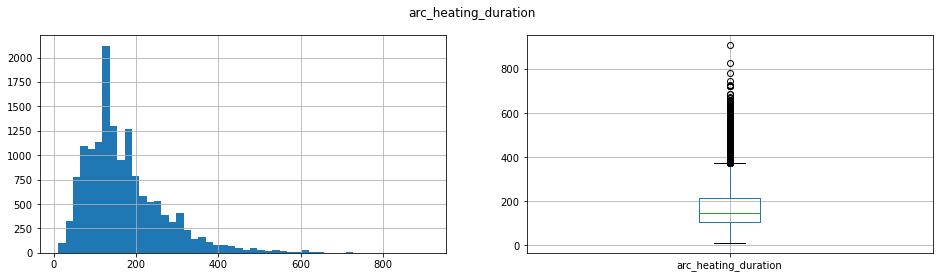

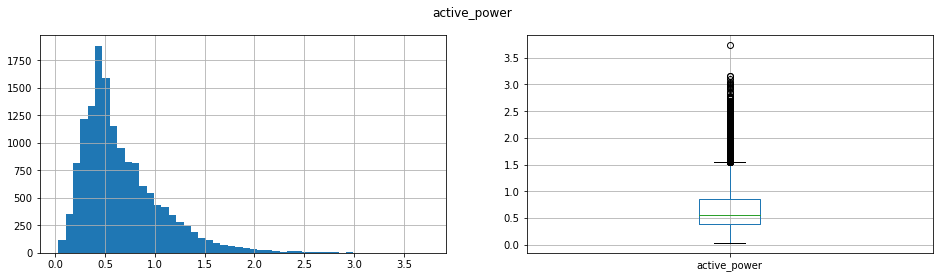

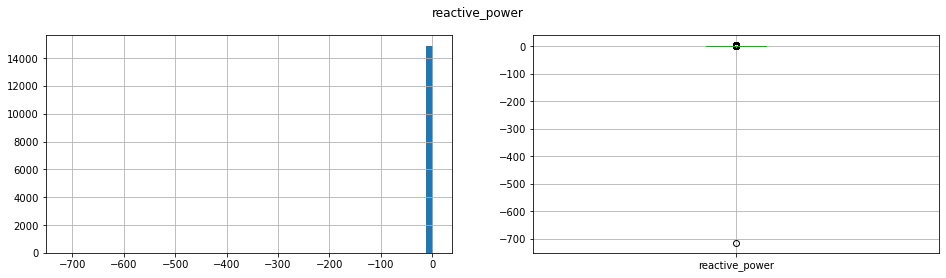

In [8]:
for feature in ['arc_heating_duration', 'active_power', 'reactive_power']:
    plt.figure(figsize=(16, 4))
    plt.suptitle(feature)

    ax = plt.subplot(1,2,1)
    data_arc[feature].hist(bins=50, ax=ax)

    ax = plt.subplot(1,2,2)
    data_arc.boxplot(column=feature)

Данные выглядят равномерно, но в признаке с реактивной мощностью есть явный выброс. Убедимся, что он единственный и удалим его

In [9]:
display(data_arc['reactive_power'].sort_values().head(3))
data_arc = data_arc[data_arc['reactive_power']>0].reset_index(drop=True)

9780   -715.504924
5596      0.020806
2419      0.021154
Name: reactive_power, dtype: float64

Взглянем на распределение без выброса

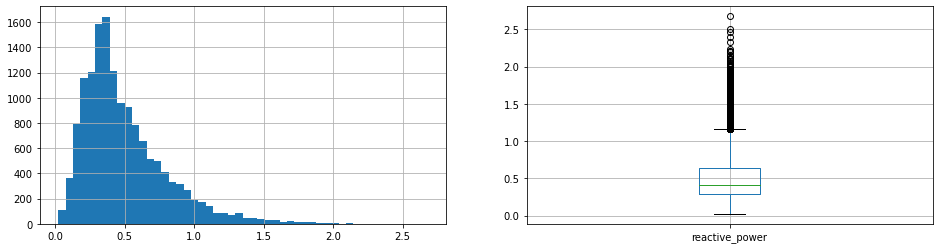

In [10]:
plt.figure(figsize=(16, 4))

ax = plt.subplot(1,2,1)
data_arc['reactive_power'].hist(bins=50, ax=ax)

ax = plt.subplot(1,2,2)
data_arc.boxplot(column='reactive_power');

Исходя из принципиов электротехники, активная и реактивная мощность должны сильно коррелировать, убедимся в этом.

Коэффициент корреляции 0.963181913151981


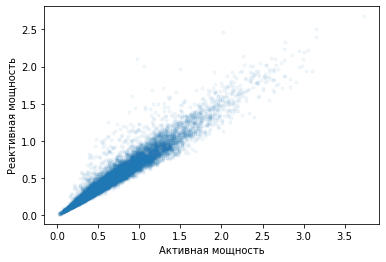

In [11]:
plt.plot(data_arc['active_power'], data_arc['reactive_power'], marker='.', linestyle='', alpha=0.05);
plt.xlabel('Активная мощность')
plt.ylabel('Реактивная мощность')
print('Коэффициент корреляции', data_arc['active_power'].corr(data_arc['reactive_power']))

Введем величину полной энергии, затраченной на итерации обработки

In [12]:
data_arc['energy'] = (data_arc['arc_heating_duration'] * (data_arc['active_power']**2 +
                                                               data_arc['reactive_power']**2)**0.5)

Агрегируем данные по партиям

In [13]:
data_arc_grouped = data_arc.groupby('key').agg({'arc_heating_duration': 'sum', 
                                                'active_power': 'mean', 
                                                'reactive_power': 'mean',
                                                'energy': 'sum'})
data_arc_grouped

,arc_heating_duration,active_power,reactive_power,energy
key,,,,
1,1098,0.975629,0.636648,1442.377754
2,811,0.763150,0.499528,881.233565
3,655,0.505176,0.319815,525.066777
4,741,0.802313,0.515074,796.911309
5,869,0.836793,0.563161,1199.137958
...,...,...,...,...
3237,909,0.786493,0.565692,958.336236
3238,546,0.702176,0.560394,555.867370
3239,1216,0.583344,0.388952,1013.067719


Добавим продолжитетельность производства каждой партии

In [14]:
data_arc_grouped['key_duration'] = (data_arc.groupby('key')['arc_heating_end'].agg('max') - 
                                    data_arc.groupby('key')['arc_heating_start'].agg('min')).dt.seconds

In [15]:
data_arc_grouped

,arc_heating_duration,active_power,reactive_power,energy,key_duration
key,,,,,
1,1098,0.975629,0.636648,1442.377754,1583
2,811,0.763150,0.499528,881.233565,1144
3,655,0.505176,0.319815,525.066777,1525
4,741,0.802313,0.515074,796.911309,1093
5,869,0.836793,0.563161,1199.137958,1362
...,...,...,...,...,...
3237,909,0.786493,0.565692,958.336236,1350
3238,546,0.702176,0.560394,555.867370,910
3239,1216,0.583344,0.388952,1013.067719,2930


## Данные о подаче сыпучих материалов (объём)

In [16]:
data_bulk.sample(3)

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
1224,1274,NaN,NaN,NaN,154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,122.0,103.0
1121,1169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,106.0,202.0
2744,2847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0,NaN,102.0,NaN


В датасете много пропусков. Скорее всего они соответствуют отсутствию данных и добавлении легирующих примесей в сплав, то есть эквивалентны нулю. Заменим пропуски нулями, но прежде выведем диаграммы размаха для каждой (итерации легирования? порции разных легирующих компонентов?)

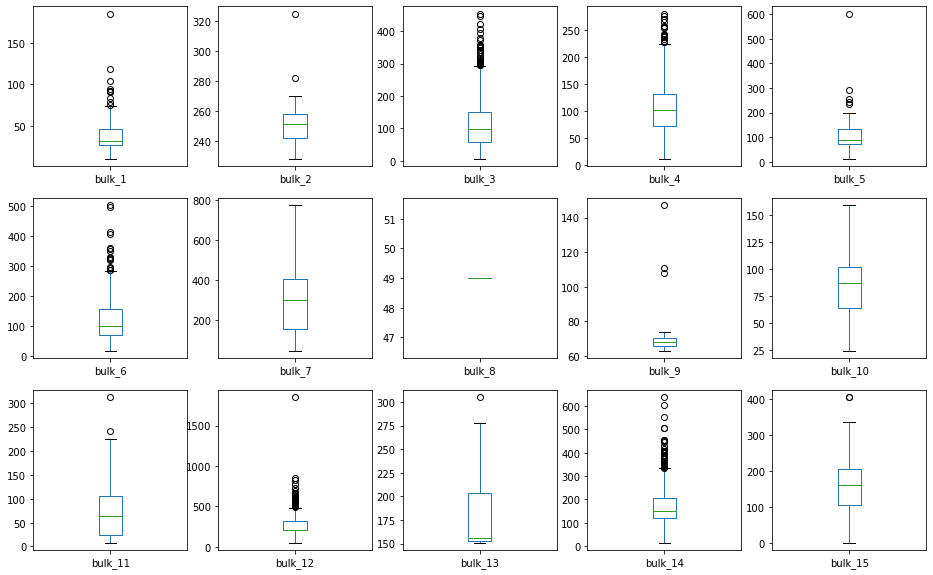

In [17]:
plt.figure(figsize=(16,10))
counter=1
for feature in data_bulk.columns[1:]:
    ax = plt.subplot(3, 5, counter)
    data_bulk.boxplot(column=feature, ax=ax, grid=False)
    counter+=1

Выбросы есть по каждой итерации, но это может быть связано с разным исходным и требуемым составом сплава, а также нужным количеством стали.

In [18]:
data_bulk = data_bulk.fillna(0)

Введем номер партии в качестве индекса

In [19]:
data_bulk = data_bulk.set_index('key', drop=True)

## Данные о подаче сыпучих материалов (время)

In [20]:
data_bulk_time.sample(3)

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
1759,1821,NaN,NaN,2019-07-07 03:40:08,NaN,2019-07-07 03:40:08,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-07 03:34:03,NaN,2019-07-07 03:34:03,2019-07-07 03:34:03
1271,1322,NaN,NaN,2019-06-19 21:50:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2248,2329,NaN,NaN,2019-07-31 00:02:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-30 23:54:56,NaN,2019-07-30 23:54:56,2019-07-30 23:54:56


In [21]:
full_info(data_bulk_time)

Feature,Non-Null Count,Null Count,Unique,Dtype,count,mean,std,min,25%,50%,75%,max
key,3129,0,3129,int64,3129,1624.38,933.338,1,816,1622,2431,3241
bulk_1,252,2877,252,object,,,,,,,,
bulk_2,22,3107,22,object,,,,,,,,
bulk_3,1298,1831,1298,object,,,,,,,,
bulk_4,1014,2115,1014,object,,,,,,,,
bulk_5,77,3052,77,object,,,,,,,,
bulk_6,576,2553,576,object,,,,,,,,
bulk_7,25,3104,25,object,,,,,,,,
bulk_8,1,3128,1,object,,,,,,,,
bulk_9,19,3110,19,object,,,,,,,,


Приведем все даты к временному формату

In [22]:
for feature in data_bulk_time.columns[1:]:
    data_bulk_time[feature] = pd.to_datetime(data_bulk_time[feature])

## Данные о продувке сплава газом

In [23]:
full_info(data_gas)

Feature,Non-Null Count,Null Count,Unique,Dtype,count,mean,std,min,25%,50%,75%,max
key,3239,0,3239,int64,3239.0,1621.861377,935.386334,1.000000,812.500000,1622.000000,2431.500000,3241.00000
amount__of_gas,3239,0,3239,float64,3239.0,11.002062,6.220327,0.008399,7.043089,9.836267,13.769915,77.99504


Явных выбросов нет

Введем номер партии в качестве индекса

In [24]:
data_gas = data_gas.set_index('key', drop=True)

## Результаты измерения температуры

In [25]:
full_info(data_temp)

Feature,Non-Null Count,Null Count,Unique,Dtype,count,mean,std,min,25%,50%,75%,max
key,15907,0,3216,int64,15907,1607.88,942.212,1,790,1618,2427,3241
measure_time,15907,0,15907,object,,,,,,,,
temperature,13006,2901,175,float64,13006,1591.84,21.3759,1191,1581,1591,1601,1705


Время, как и в прошлых датасетах, имеет не временной тип, а температура указана не для всех наблюдений, что исключает возможность использовать некоторые партии металла для обучения

In [26]:
data_temp['measure_time'] = pd.to_datetime(data_temp['measure_time'])

Отсортируем замеры температуры внутри каждой партии по времени

In [27]:
data_temp = data_temp.sort_values(['key', 'measure_time'])

Выделим для каждой партии температуру начала и конца процесса, а также удалим пропуски

In [28]:
data_temp_grouped = (data_temp.groupby('key')
                    .agg(start_temperature=('temperature', lambda x: x.head(1)), 
                         finish_temperature=('temperature', lambda x: x.tail(1))).dropna())

Проверим, влияет ли общее время приготовления сплава на температуру, иными словами, присутствует ли эффект остывания расплава в ковше в период длительной паузы между итерациями нагрева (замера температуры)

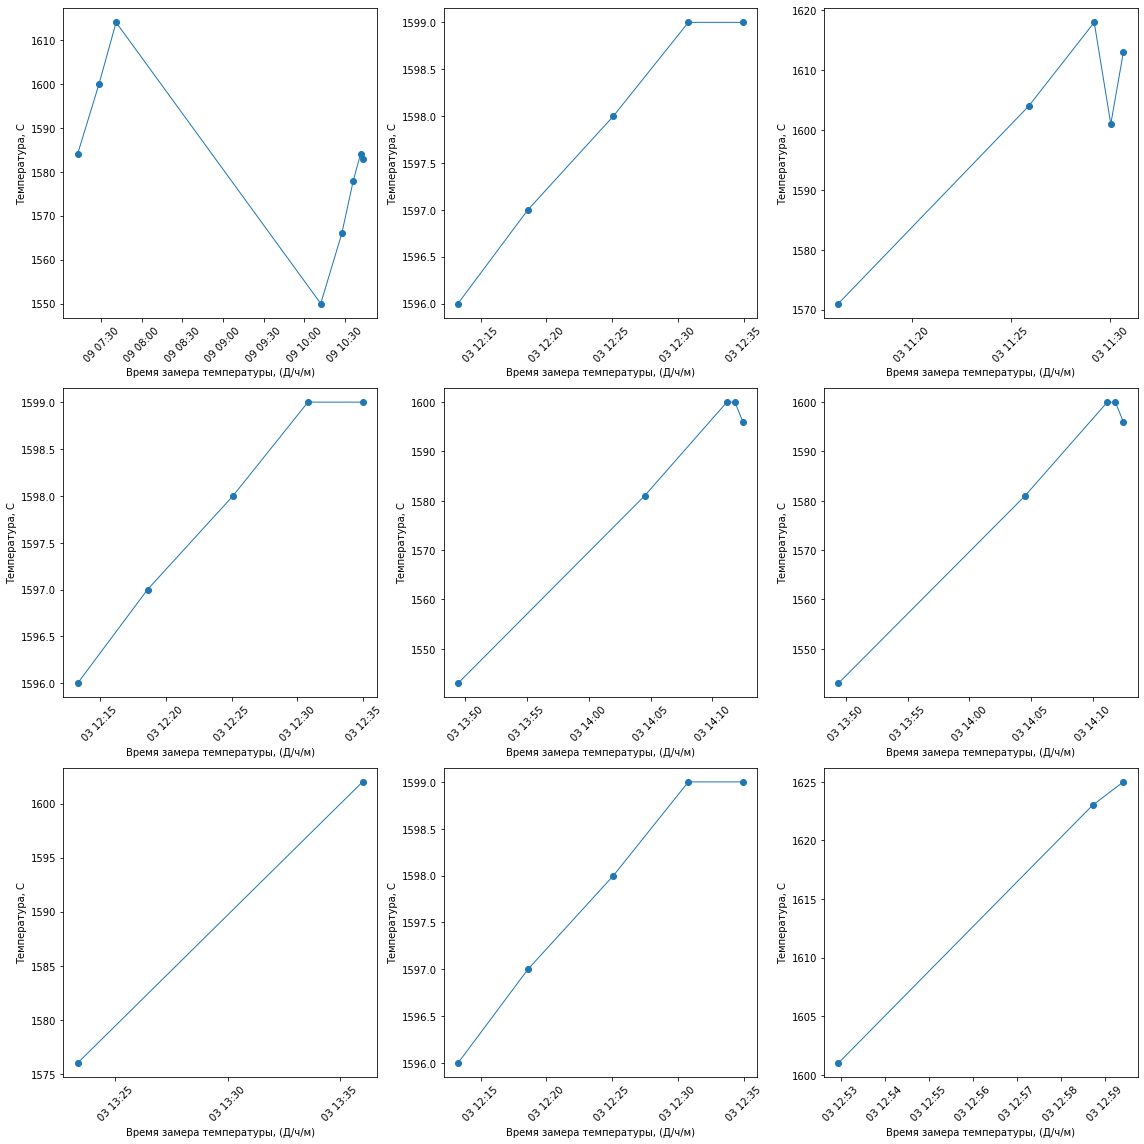

In [29]:
plt.figure(figsize=(16, 16))
for i in range(1, 10):

    
    plt.subplot(3, 3, i)
    key = random.randint(1, 6)
    if i == 1:
        key = 1881
    x = data_temp[data_temp['key']==key]['measure_time']
    y = data_temp[data_temp['key']==key]['temperature']
    plt.plot(x, y, linewidth=1, marker='o')
    plt.xlabel('Время замера температуры, (Д/ч/м)')
    plt.ylabel('Температура, С')
    plt.xticks(rotation=45)
    plt.tight_layout()

Действительно, по первому графику видно, что около трех часов в ковше не замеряли температуру, то есть не проводили никаких операций по легированию и нагреву. За это время ковш успеть немного остыть

## Данные о проволочных материалах (объём)

In [30]:
full_info(data_wire)

Feature,Non-Null Count,Null Count,Unique,Dtype,count,mean,std,min,25%,50%,75%,max
key,3081,0,3081,int64,3081.0,1623.426485,932.997,1.000000,823.000000,1619.000000,2434.000000,3241.000000
wire_1,3055,26,2269,float64,3055.0,100.895853,42.0125,1.918800,72.115684,100.158234,126.060484,330.314424
wire_2,1079,2002,713,float64,1079.0,50.577323,39.3202,0.030160,20.193680,40.142956,70.227558,282.780152
wire_3,63,3018,56,float64,63.0,189.482681,99.5134,0.144144,95.135044,235.194977,276.252014,385.008668
wire_4,14,3067,14,float64,14.0,57.442842,28.8247,24.148801,40.807002,45.234282,76.124619,113.231044
wire_5,1,3080,1,float64,1.0,15.132000,,15.132000,15.132000,15.132000,15.132000,15.132000
wire_6,73,3008,70,float64,73.0,48.016974,33.9198,0.034320,25.053600,42.076324,64.212723,180.454575
wire_7,11,3070,10,float64,11.0,10.039007,8.61058,0.234208,6.762756,9.017009,11.886057,32.847674
wire_8,19,3062,13,float64,19.0,53.625193,16.8817,45.076721,46.094879,46.279999,48.089603,102.762401
wire_9,29,3052,25,float64,29.0,34.155752,19.9316,4.622800,22.058401,30.066399,43.862003,90.053604


Как и в случае с сыпучими материалами, не на всех этапах в расплав подавалась проволока, поэтому имеется существенное число пропусков

In [31]:
data_wire = data_wire.fillna(0)

Введем номер партии в качестве индекса

In [32]:
data_wire = data_wire.set_index('key', drop=True)

## Данные о проволочных материалах (время)

In [33]:
data_wire_time.head(5)

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Приведем все даты к временному формату

In [34]:
for feature in data_wire_time.columns[1:]:
    data_wire_time[feature] = pd.to_datetime(data_wire_time[feature])

## Создание единого датасета

Сформируем единый датасет, объединяющий все признаки каждой партии, и выведем его статистические характеристики

In [35]:
data = data_temp_grouped.join([data_arc_grouped, data_bulk, data_gas, data_wire], how='inner')
data.sample(3)

,start_temperature,finish_temperature,arc_heating_duration,active_power,reactive_power,energy,key_duration,bulk_1,bulk_2,bulk_3,...,amount__of_gas,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
key,,,,,,,,,,,,,,,,,,,,,
619,1578.0,1601.0,761,0.581452,0.418470,578.096898,1319,0.0,0.0,0.0,...,9.824798,90.043198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,1613.0,1620.0,920,0.910960,0.632532,1732.276180,2161,0.0,0.0,0.0,...,17.999624,150.215515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2415,1569.0,1586.0,607,0.778605,0.630804,835.572486,902,0.0,0.0,104.0,...,5.444091,47.087040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
full_info(data)

Feature,Non-Null Count,Null Count,Unique,Dtype,count,mean,std,min,25%,50%,75%,max
start_temperature,2329,0,137,float64,2329.0,1586.718763,28.290792,1191.000000,1571.000000,1587.000000,1603.000000,1660.000000
finish_temperature,2329,0,75,float64,2329.0,1593.365393,11.200915,1541.000000,1587.000000,1593.000000,1598.000000,1653.000000
arc_heating_duration,2329,0,1037,int64,2329.0,807.600687,340.897332,57.000000,581.000000,778.000000,993.000000,4189.000000
active_power,2329,0,2329,float64,2329.0,0.669044,0.196943,0.186226,0.526430,0.644404,0.792065,1.421416
reactive_power,2329,0,2329,float64,2329.0,0.499276,0.147383,0.130062,0.392506,0.487685,0.592351,1.134983
energy,2329,0,2329,float64,2329.0,902.899819,650.783807,15.158096,465.235480,767.817794,1165.650557,10630.980668
key_duration,2329,0,1588,int64,2329.0,1964.267926,1341.745661,57.000000,1302.000000,1712.000000,2385.000000,23485.000000
bulk_1,2329,0,38,float64,2329.0,3.427651,12.412132,0.000000,0.000000,0.000000,0.000000,185.000000
bulk_2,2329,0,13,float64,2329.0,1.422499,19.082119,0.000000,0.000000,0.000000,0.000000,325.000000
bulk_3,2329,0,265,float64,2329.0,47.348218,75.310430,0.000000,0.000000,0.000000,80.000000,454.000000


В признаках `wire_5` и `bulk_8` встречаются всего одно-два уникальных значений, и это преимущественно. Избавимся от этих признаков, поскольку корреляции между ними и целевой переменной явно нет

In [37]:
data = data.drop(['bulk_8', 'wire_5'], axis=1)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Что ж, самое сложно позади, впереди только моделирование) Изучаю дальше.

# Обучение моделей

## Проверка на мультиколлинеарность

Построим тепловую карту корреляций между признаками. Так как отрицательная корреляция имеет для нас не меньшее значение, чем положительная, возьмем модуль от матрицы корреляций. Так ориентироватсья по цветовой шкале будет удобнее

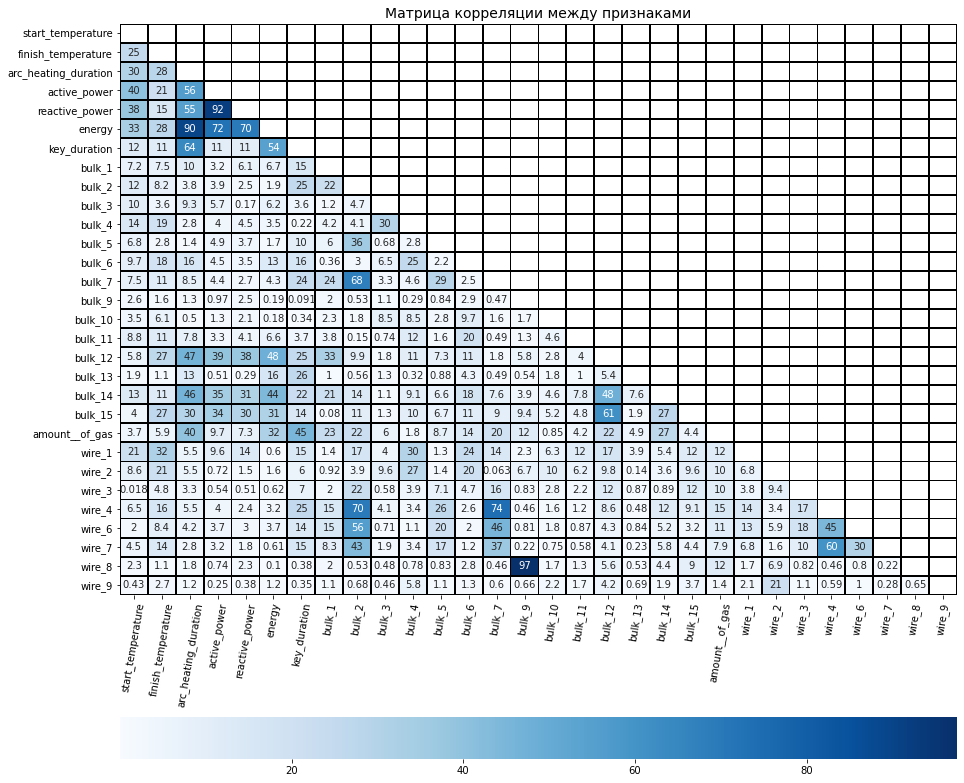

In [38]:
plt.figure(figsize=(15, 15))
matrix = np.triu(data.corr())
plt.title('Матрица корреляции между признаками', size=14)
sns.heatmap(100*abs(data.corr()), 
            annot=True,
            fmt ='.2g', 
            cmap= 'Blues', 
            linewidths=0.9, 
            linecolor='black', 
            cbar=True,
            cbar_kws={"orientation": "horizontal"},
            square=False,
            mask=matrix);
plt.xticks(rotation=80);

Сильная корреляция есть между производными признаками: активной и реактивной мощностью, энергией и временем нагрева. Все переменные в некоторой степени коррелируют с целевым признаком, но эта корреляция не превышает 0.4, то есть утечки целевой переменной нет.

## Разделение датасета на обучающую и тестовую выборки

In [39]:
x = data.drop('finish_temperature', axis=1)
y = data['finish_temperature']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123) 

In [41]:
for df in [x_train, x_test, y_train, y_test]:
    print(df.shape)

(1863, 29)
(466, 29)
(1863,)
(466,)


## Обучение моделей

Проверим в рамках обучения линейные модели, в том числе модели с регуляризацией, и градиентный бустинг

In [42]:
def objective(trial):
    
    scaler = StandardScaler()
    
    n = trial.suggest_int('n_components', x_train.shape[1]-3, x_train.shape[1])
    pca = PCA(n_components=n)
    
    estimators = trial.suggest_categorical('estimator', ['lr', 'ridge', 'lasso', 'elastic_net', 'rfr', 'cbr'])
    if estimators == 'lr':
        estimator = LinearRegression(n_jobs=-1)
        
    elif estimators == 'ridge':
        alpha = trial.suggest_float('alpha', 0.1, 10)
        estimator = Ridge(alpha=alpha)
        
    elif estimators == 'lasso':
        alpha = trial.suggest_float('alpha', 0.1, 10)
        estimator = Lasso(alpha=alpha)
        
    elif estimators == 'elastic_net':
        alpha = trial.suggest_float('alpha', 0.1, 10)
        l1_ratio = trial.suggest_float('l1_ratio', 0.01, 1)
        estimator = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        
    elif estimators == 'rfr':
        n_estimators = trial.suggest_int('n_estimators', 5, 25)
        max_depth = trial.suggest_int('max_depth', 3, 30)
        estimator = RandomForestRegressor(n_estimators=n_estimators)
        
    elif estimators == 'cbr':
        estimator = CatBoostRegressor(random_seed=123)

    pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('estimator', estimator)])
    
    res = -1*cross_val_score(pipe, x_train, y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, error_score='raise').mean()
    
    return res

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>серьёзный модельный задел)<br>
    
(Ниже не дождался отработки кода... прервал.. По качеству  - всё ок)

In [ ]:
study = optuna.create_study(sampler=RandomSampler(seed=42), direction='minimize')
study.optimize(objective, n_trials=10e5, timeout=120)

In [44]:
study.best_trial

FrozenTrial(number=41, values=[5.84832189715338], datetime_start=datetime.datetime(2022, 6, 20, 16, 2, 55, 915443), datetime_complete=datetime.datetime(2022, 6, 20, 16, 3, 8, 470663), params={'n_components': 28, 'estimator': 'cbr'}, distributions={'n_components': IntUniformDistribution(high=29, low=26, step=1), 'estimator': CategoricalDistribution(choices=('lr', 'ridge', 'lasso', 'elastic_net', 'rfr', 'cbr'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=41, state=TrialState.COMPLETE, value=None)

## Проверка на тестовой выборке

Лучше всех себя показал CatBoostRegressor с 28 признаками. Но в этом случае сложность интерпретировать признаки, поэтому выберем в качестве лучшей модели градиентный бустинг без использования метода главных компонент - его точность практически не уступает лучшей модели

In [45]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>раздельное масштабирование, ОК.

In [46]:
model = CatBoostRegressor()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
mae(y_test, predicted)

Learning rate set to 0.045172
0:	learn: 11.1053813	total: 163ms	remaining: 2m 43s
1:	learn: 10.9562173	total: 166ms	remaining: 1m 22s
2:	learn: 10.8288697	total: 168ms	remaining: 55.9s
3:	learn: 10.7283570	total: 171ms	remaining: 42.6s
4:	learn: 10.6158530	total: 174ms	remaining: 34.6s
5:	learn: 10.5015043	total: 176ms	remaining: 29.2s
6:	learn: 10.3893745	total: 179ms	remaining: 25.4s
7:	learn: 10.2718849	total: 182ms	remaining: 22.6s
8:	learn: 10.1675118	total: 185ms	remaining: 20.4s
9:	learn: 10.0836897	total: 188ms	remaining: 18.6s
10:	learn: 9.9941306	total: 190ms	remaining: 17.1s
11:	learn: 9.9152946	total: 193ms	remaining: 15.9s
12:	learn: 9.8288246	total: 195ms	remaining: 14.8s
13:	learn: 9.7472463	total: 198ms	remaining: 13.9s
14:	learn: 9.6679055	total: 200ms	remaining: 13.2s
15:	learn: 9.5921178	total: 203ms	remaining: 12.5s
16:	learn: 9.5250864	total: 206ms	remaining: 11.9s
17:	learn: 9.4514591	total: 209ms	remaining: 11.4s
18:	learn: 9.3925169	total: 211ms	remaining: 10.9s

5.703375129667268

Mae 5.7

## Оценка важности признаков

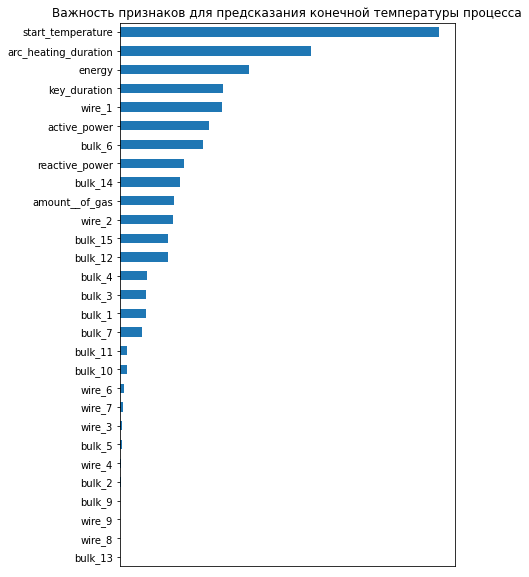

In [47]:
plt.figure(figsize=(6,10))
pd.Series(model.get_feature_importance(), data.drop('finish_temperature', axis=1).columns).sort_values().plot.barh();
plt.title('Важность признаков для предсказания конечной температуры процесса', size=12);
plt.xticks([]);

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>хорошо, что используешь этот инструмент. На начальном этапе мы можем нагенерить множество разных фич, в том чтисле и лишних. И вот этот инструмент, вкупе с анализом мультиколлинеарности позволяет избавляться от "балласта")

# Выводы

* В рамках проекта исследованы характеристики технологического процесса производства стали
* Выявлено, что для производства каждой партии требуются различные усилия что обусловлено неоднородным химическим составом сырья и легирующих добавок
* На основе предоставленных признаков сформирован датасет
* Были проанализированы различные модели машинного обучения, из которых лучший результат показал градиентный бустинг (MAE 5.7)
* Признаки были ранжированы по важности, и сильнее всего на целевую переменную влияют параметры и время нагрева, немного меньше - объемы добавленных легирующих компонентов.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ОК, Захар, однозначно сильная работа!!!<br>
Я бы привёл ещё такие эпитеты: аналитический и вдумчивый проект.<br>
 
Технически - добротная работа. <br>
Всегда стараюсь на этом проекте сказать всем вот ещё что: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
<font color='green'>

В общем-то, вопросов у меня и нет особых)<br>
Возможно, что у тебя остались/появились?

<div class="alert alert-info" style="border-color: green; border-radius: 5px">
    <p><u><b> КОММЕНТАРИЙ студента</b></u></p>
    
Привет, Николай! Спасибо за высокую оценку!
    
Я, кстати, так и не увидел в проекте ни прямой, ни косвенной связи конечной температуры с энергоэффективностью. На потраченную электроэнергию влияют мощность и время) Мощность зависит от массы и теплоемкости металла, а время - от "рецептуры" сплава, ну и количества итераций, за которое сталевар доводит сплав до требований, указанных технологом. Сходу можно сказать, что на подопытном металлургическом комбинате есть пробелма простаивания ковша: работяги условно ушли на обед, а ковш остывает. Надо будет заново его потом греть. Я выявил пару таких партий и вывел на графике.
    
То, что конечная температура зависит от начальной не удивительно: чем сильней нагрето, тем меньше надо греть) Так что это вряд ли станет откровением для технологов, они наверняка уже продумали утилизацию теплоты от холодильных машин, паровых котлов и градирен, изолировали ковш и сократили сталевару перекур)
    
Про анализ остальных факторов - вопрос философский, я что-то не задумывался о том, что рекомендация для бизнеса может выходить за рамки предоставленных данных. Но звучит логично, чем более предсказуемы данные, тем проще найти максимум. Можно даже раскрутить мысль до того, что зависимость целевой функции от каждой переменной интерполировать функцией (кстати, почему мы проходим только линейную регрессию? на ее месте ведь может быть полином любой степени!) и вообще решить задачу строго математически. Продолжая твою мысль, можно улететь во фрактал, где каждый признак является целевым какого-то набора фич. Но параллельно с ростом признаков будет усложняться и вопрос к бизнесу - как он устроен и где искать корреляции) Я работаю на заводе поменьше, чем мет.комбинат, я на связи со всеми стейкхолдерами от заводчан до владельцев, но знаешь, иной раз при попытке вникнуть в процессы получается лишь получить некое усредненное мнение)) Наверно где-то и существует бизнес, работающий как часы, но у них и без дата саентистов все хорошо)))
    
<br>


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
ОК, Захар, интересные идеи! А то, что нужно выходить за рамки данных - 100% реальная история. Тем более, что по заданию - просто изаестны данные. А так-то будет просто задача. А сами данные - дело уже исследовательское будет: придумать набор факторов, которые будут влиять на целевую.<br>    
    
С аномалиями в партиях - ОК. Есть ещё что по исследовать - тут точно ты подметил<r>
    
А вот с тем, что можно подгнать любой полином - тут не соглашусь) Т.е. соглашусь с тем, что это безусловно возможно. Но предсказательная сила такой модели стремится к нулю. Она просто будет заниматься подгонкой результата.<br>

И по истории с разбором бизнес-процессов - у меня есть тоже особое мнение.  Но это уже, видимо, вопрос на с овместное обсуждение с бокалом чая))<br>
    
Спасибо за открытость суждений, за этот труд и за совместную работу на других проектах)<br>
Искренне желаю покорить ещё не один аналитический Эверест)<br>

# Отчет

* Все пункты плана, кроме сравнения моделей по скорости работы, выполнены. Для датасета с небольшим числом признаков скорость обучения и предсказания для всех моделей невелики.
* Возникла проблема с интерпретацией задачи, но на консультации все разобрали. В остальном пригодились приёмы из старых проектов
* Все как всегда, ключевое - анализ задания и результата. Потом - EDA, и обучение
* Лучшую точность показал градиентный бустинг, его MAE на тестовой выборке - 5.7